In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/naive-bayes-classification-data/Naive-Bayes-Classification-Data.csv


# Implement a single neural network and test for different logic gates

In [2]:
import tensorflow as tf
import numpy as np
for gate in ['AND',"OR",'XOR']: 
    print(gate)
    print()
    # Define the training data for different logic gates
    if gate == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float)
        y = np.array([0, 0, 0, 1], dtype=float)
    elif gate == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float)
        y = np.array([0, 1, 1, 1], dtype=float)
    elif gate == "XOR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float)
        y = np.array([0, 1, 1, 0], dtype=float)
    else:
        raise ValueError("Invalid gate type")

    # Define a simple neural network
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),         # Input layer with 2 neurons
        tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer with 2 neurons and sigmoid activation
        tf.keras.layers.Dense(1, activation='sigmoid')   # Output layer with 1 neuron and sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=1000, verbose=0)

    # Test the model on the training data
    predictions = model.predict(X)
    print("Predictions:")
    for i in range(len(X)):
        print(f"Input: {X[i]}, Predicted Output: {predictions[i][0]:.4f}, Actual Output: {y[i]}")
    print('\n\n')

AND

1/1 [==============================] - 0s 80ms/step
Predictions:
Input: [0. 0.], Predicted Output: 0.0937, Actual Output: 0.0
Input: [0. 1.], Predicted Output: 0.3271, Actual Output: 0.0
Input: [1. 0.], Predicted Output: 0.1200, Actual Output: 0.0
Input: [1. 1.], Predicted Output: 0.8716, Actual Output: 1.0



OR

1/1 [==============================] - 0s 48ms/step
Predictions:
Input: [0. 0.], Predicted Output: 0.3062, Actual Output: 0.0
Input: [0. 1.], Predicted Output: 0.9373, Actual Output: 1.0
Input: [1. 0.], Predicted Output: 0.9358, Actual Output: 1.0
Input: [1. 1.], Predicted Output: 0.9962, Actual Output: 1.0



XOR

1/1 [==============================] - 0s 48ms/step
Predictions:
Input: [0. 0.], Predicted Output: 0.2180, Actual Output: 0.0
Input: [0. 1.], Predicted Output: 0.8071, Actual Output: 1.0
Input: [1. 0.], Predicted Output: 0.8095, Actual Output: 1.0
Input: [1. 1.], Predicted Output: 0.1898, Actual Output: 0.0





# Wap to calculate the accuarcy , precision and recall for your dataset . Naiye bayes model.

In [3]:
df = pd.read_csv('/kaggle/input/naive-bayes-classification-data/Naive-Bayes-Classification-Data.csv')
df.shape

(995, 3)

In [4]:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [5]:
df.isna().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [6]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


<Axes: >

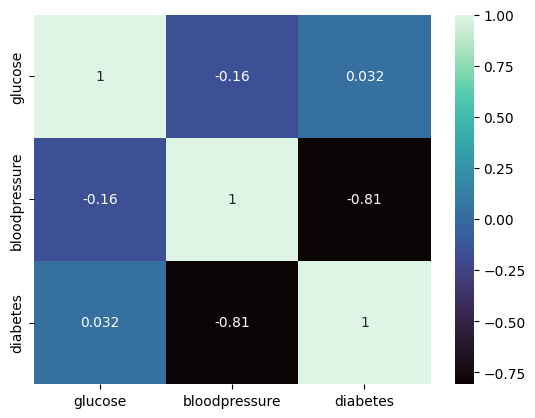

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='mako')

In [8]:
X = df.drop(['diabetes'],axis=1)
y = df['diabetes']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
print("Classification Report\n\n",classification_report(y_test,y_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.92      0.93       105
           1       0.92      0.93      0.92        94

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.92      0.92      0.92       199



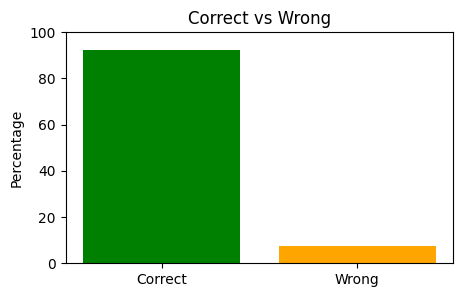

Correct : 92.46231155778895 %
Wrong : 7.537688442211055 %


In [11]:
import matplotlib.pyplot as plt
arr = confusion_matrix(y_test,y_pred)
c = (arr[0][0]+arr[1][1])/X_test.shape[0]*100
n = (arr[0][1]+arr[1][0])/X_test.shape[0]*100
plt.figure(figsize=(5,3))
plt.bar(['Correct','Wrong'],[c,n],color=['green','orange'])
plt.title('Correct vs Wrong')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()
print('Correct :',c,'%')
print('Wrong :',n,'%')

<Axes: >

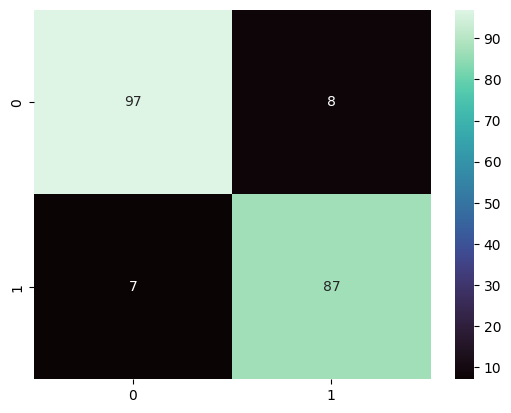

In [12]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='mako')